In [2]:
import pandas as pd
import matplotlib.pyplot as plt

## Dicionário de Variáveis

|Dicionário de Variáveis| Descrição da variável|
|:---|:---:|
|ANO_NASCIMENTO| Ano de nascimento dos alistados|
|PESO| Peso (em quilogramas) dos alistados|
|ALTURA| Altura (em centímetros) da altura dos alistados|
|CABECA| Medida (em centímetros) da cabeça alistados|
|CALCADO| Medida dos pés dos alistados|
|CINTURA| Altura (em centímetros) da cintura dos alistados|
|MUN_NASCIMENTO| Município de nascimento dos alistados|
|UF_NASCIMENTO| Estado de nascimento dos alistados|
|PAIS_NASCIMENTO| País de nascimento dos alistados|
|ESTADO_CIVIL | Estado civil dos alistados|
|SEXO| Sexo dos alistados|
|ESCOLARIDADE| Nível de escolaridade dos alistados|
|VINCULACAO_ANO| Ano de alistamento|
|DISPENSA| Resultado da dispensa ou não dos alistados|
|ZONA_RESIDENCIAL| Zona de residência dos alistados|
|MUN_RESIDENCIA| Município de residência dos alistados|
|UF_RESIDENCIA| Estado de residência dos alistados|
|PAIS_RESIDENCIA| País de residência dos alistados|
|JSM| Junta de Serviço Militar em que foi alistado|
|MUN_JSM| Município da Junta de Serviço Militar|
|UF_JSM| Estado da Junta de Serviço Militar|
|IDADE_ALISTADO|Idade do alistado no ano de alistamento|
|IMC|Medição do Índice de Massa Corpórea do alistado|
|CLASSIFICACAO_IMC|Classificação corpórea do alistado de acordo com seu IMC|
|REGIAO_NASCIMENTO|Região brasileira de nascimento do alistado|
|REGIAO_RESIDENCIA|Região brasileira de residência do alistado|

In [3]:
df = pd.read_csv('alistamento_militar_2022.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300914 entries, 0 to 300913
Data columns (total 22 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        300914 non-null  int64  
 1   ANO_NASCIMENTO    300914 non-null  int64  
 2   PESO              300914 non-null  float64
 3   ALTURA            300914 non-null  float64
 4   CABECA            300914 non-null  float64
 5   CALCADO           300914 non-null  float64
 6   CINTURA           300914 non-null  float64
 7   MUN_NASCIMENTO    300914 non-null  object 
 8   UF_NASCIMENTO     300914 non-null  object 
 9   PAIS_NASCIMENTO   300914 non-null  object 
 10  ESTADO_CIVIL      300914 non-null  object 
 11  SEXO              300914 non-null  object 
 12  ESCOLARIDADE      300914 non-null  object 
 13  VINCULACAO_ANO    300914 non-null  int64  
 14  DISPENSA          300914 non-null  object 
 15  ZONA_RESIDENCIAL  300914 non-null  object 
 16  MUN_RESIDENCIA    30

In [4]:
df.head()

,Unnamed: 0,ANO_NASCIMENTO,PESO,ALTURA,CABECA,CALCADO,CINTURA,MUN_NASCIMENTO,UF_NASCIMENTO,PAIS_NASCIMENTO,...,ESCOLARIDADE,VINCULACAO_ANO,DISPENSA,ZONA_RESIDENCIAL,MUN_RESIDENCIA,UF_RESIDENCIA,PAIS_RESIDENCIA,JSM,MUN_JSM,UF_JSM
0,1,1995,79.0,181.0,56.0,41.0,88.0,PALMEIRA DAS MISSOES,RS,BRASIL,...,Ensino Médio Completo,2022,Com dispensa,Urbana,CANOAS,RS,BRASIL,10/52 - PALMEIRA DAS MISSOES,PALMEIRA DAS MISSOES,RS
1,2,1974,64.0,165.0,58.0,38.0,75.0,PORTO ALEGRE,RS,BRASIL,...,7° Ano - Ensino Fundamental,2022,Com dispensa,Urbana,ITAJAI,SC,BRASIL,16/28 - ITAJAI,ITAJAI,SC
2,3,1998,55.0,180.0,53.0,41.0,74.0,JANDIRA,SP,BRASIL,...,Ensino Médio Completo,2022,Com dispensa,Urbana,SERTAOZINHO,SP,BRASIL,5/123 - SERTAOZINHO,SERTAOZINHO,SP
3,4,1999,76.0,186.0,57.0,42.0,88.0,CACERES,MT,BRASIL,...,3° Ano - Ensino Médio,2022,Com dispensa,Urbana,CACERES,MT,BRASIL,30/24 - CACERES,CACERES,MT
4,5,2000,76.0,184.0,58.0,42.0,78.0,BRASILIA,DF,BRASIL,...,2° Semestre - Ensino Superior,2022,Com dispensa,Rural,BRASILIA,DF,BRASIL,7/331 - BRASILIA (SAMAMBAIA),BRASILIA,DF


### Criação e atribuição de valores às colunas 'REGIAO_NASCIMENTO' e 'REGIAO_RESIDENCIA'

In [10]:
regioes = {'Norte': ['AC', 'AP', 'AM', 'PA', 'RO', 'RR', 'TO'], 
           'Nordeste': ['AL', 'BA', 'CE', 'MA', 'PB', 'PE', 'PI', 'RN', 'SE'],
           'Centro-Oeste': ['DF', 'GO', 'MT', 'MS'],
           'Sudeste': ['ES', 'MG', 'RJ', 'SP'],
           'Sul': ['PR', 'RS', 'SC']}

In [11]:
for i in range(len(regioes['Norte'])):
    print(f"(df['UF_NASCIMENTO'] == regioes['Norte'][{i}])|")

(df['UF_NASCIMENTO'] == regioes['Norte'][0])|
(df['UF_NASCIMENTO'] == regioes['Norte'][1])|
(df['UF_NASCIMENTO'] == regioes['Norte'][2])|
(df['UF_NASCIMENTO'] == regioes['Norte'][3])|
(df['UF_NASCIMENTO'] == regioes['Norte'][4])|
(df['UF_NASCIMENTO'] == regioes['Norte'][5])|
(df['UF_NASCIMENTO'] == regioes['Norte'][6])|


In [12]:
df.loc[(df['UF_NASCIMENTO'] == regioes['Norte'][0])|
       (df['UF_NASCIMENTO'] == regioes['Norte'][1])|
       (df['UF_NASCIMENTO'] == regioes['Norte'][2])|
       (df['UF_NASCIMENTO'] == regioes['Norte'][3])|
       (df['UF_NASCIMENTO'] == regioes['Norte'][4])|
       (df['UF_NASCIMENTO'] == regioes['Norte'][5])|
       (df['UF_NASCIMENTO'] == regioes['Norte'][6]), 'REGIAO_NASCIMENTO'] = 'Norte'

In [13]:
for i in range(len(regioes['Nordeste'])):
    print(f"(df['UF_NASCIMENTO'] == regioes['Nordeste'][{i}])|")

(df['UF_NASCIMENTO'] == regioes['Nordeste'][0])|
(df['UF_NASCIMENTO'] == regioes['Nordeste'][1])|
(df['UF_NASCIMENTO'] == regioes['Nordeste'][2])|
(df['UF_NASCIMENTO'] == regioes['Nordeste'][3])|
(df['UF_NASCIMENTO'] == regioes['Nordeste'][4])|
(df['UF_NASCIMENTO'] == regioes['Nordeste'][5])|
(df['UF_NASCIMENTO'] == regioes['Nordeste'][6])|
(df['UF_NASCIMENTO'] == regioes['Nordeste'][7])|
(df['UF_NASCIMENTO'] == regioes['Nordeste'][8])|


In [14]:
df.loc[(df['UF_NASCIMENTO'] == regioes['Nordeste'][0])|
       (df['UF_NASCIMENTO'] == regioes['Nordeste'][1])|
       (df['UF_NASCIMENTO'] == regioes['Nordeste'][2])|
       (df['UF_NASCIMENTO'] == regioes['Nordeste'][3])|
       (df['UF_NASCIMENTO'] == regioes['Nordeste'][4])|
       (df['UF_NASCIMENTO'] == regioes['Nordeste'][5])|
       (df['UF_NASCIMENTO'] == regioes['Nordeste'][6])|
       (df['UF_NASCIMENTO'] == regioes['Nordeste'][7])|
       (df['UF_NASCIMENTO'] == regioes['Nordeste'][8]), 'REGIAO_NASCIMENTO'] = 'Nordeste'

In [15]:
for i in range(len(regioes['Centro-Oeste'])):
    print(f"(df['UF_NASCIMENTO'] == regioes['Centro-Oeste'][{i}])|")

(df['UF_NASCIMENTO'] == regioes['Centro-Oeste'][0])|
(df['UF_NASCIMENTO'] == regioes['Centro-Oeste'][1])|
(df['UF_NASCIMENTO'] == regioes['Centro-Oeste'][2])|
(df['UF_NASCIMENTO'] == regioes['Centro-Oeste'][3])|


In [16]:
df.loc[(df['UF_NASCIMENTO'] == regioes['Centro-Oeste'][0])|
(df['UF_NASCIMENTO'] == regioes['Centro-Oeste'][1])|
(df['UF_NASCIMENTO'] == regioes['Centro-Oeste'][2])|
(df['UF_NASCIMENTO'] == regioes['Centro-Oeste'][3]), 'REGIAO_NASCIMENTO'] = 'Centro-Oeste'

In [17]:
for i in range(len(regioes['Sudeste'])):
    print(f"(df['UF_NASCIMENTO'] == regioes['Sudeste'][{i}])|")

(df['UF_NASCIMENTO'] == regioes['Sudeste'][0])|
(df['UF_NASCIMENTO'] == regioes['Sudeste'][1])|
(df['UF_NASCIMENTO'] == regioes['Sudeste'][2])|
(df['UF_NASCIMENTO'] == regioes['Sudeste'][3])|


In [18]:
df.loc[(df['UF_NASCIMENTO'] == regioes['Sudeste'][0])|
(df['UF_NASCIMENTO'] == regioes['Sudeste'][1])|
(df['UF_NASCIMENTO'] == regioes['Sudeste'][2])|
(df['UF_NASCIMENTO'] == regioes['Sudeste'][3]), 'REGIAO_NASCIMENTO'] = 'Sudeste'

In [19]:
for i in range(len(regioes['Sul'])):
    print(f"(df['UF_NASCIMENTO'] == regioes['Sul'][{i}])|")

(df['UF_NASCIMENTO'] == regioes['Sul'][0])|
(df['UF_NASCIMENTO'] == regioes['Sul'][1])|
(df['UF_NASCIMENTO'] == regioes['Sul'][2])|


In [20]:
df.loc[(df['UF_NASCIMENTO'] == regioes['Sul'][0])|
(df['UF_NASCIMENTO'] == regioes['Sul'][1])|
(df['UF_NASCIMENTO'] == regioes['Sul'][2]), 'REGIAO_NASCIMENTO'] = 'Sul'

In [21]:
df.loc[(df['UF_RESIDENCIA'] == regioes['Norte'][0])|
       (df['UF_RESIDENCIA'] == regioes['Norte'][1])|
       (df['UF_RESIDENCIA'] == regioes['Norte'][2])|
       (df['UF_RESIDENCIA'] == regioes['Norte'][3])|
       (df['UF_RESIDENCIA'] == regioes['Norte'][4])|
       (df['UF_RESIDENCIA'] == regioes['Norte'][5])|
       (df['UF_RESIDENCIA'] == regioes['Norte'][6]), 'REGIAO_RESIDENCIA'] = 'Norte'

df.loc[(df['UF_RESIDENCIA'] == regioes['Nordeste'][0])|
       (df['UF_RESIDENCIA'] == regioes['Nordeste'][1])|
       (df['UF_RESIDENCIA'] == regioes['Nordeste'][2])|
       (df['UF_RESIDENCIA'] == regioes['Nordeste'][3])|
       (df['UF_RESIDENCIA'] == regioes['Nordeste'][4])|
       (df['UF_RESIDENCIA'] == regioes['Nordeste'][5])|
       (df['UF_RESIDENCIA'] == regioes['Nordeste'][6])|
       (df['UF_RESIDENCIA'] == regioes['Nordeste'][7])|
       (df['UF_RESIDENCIA'] == regioes['Nordeste'][8]), 'REGIAO_RESIDENCIA'] = 'Nordeste'

df.loc[(df['UF_RESIDENCIA'] == regioes['Centro-Oeste'][0])|
       (df['UF_RESIDENCIA'] == regioes['Centro-Oeste'][1])|
       (df['UF_RESIDENCIA'] == regioes['Centro-Oeste'][2])|
       (df['UF_RESIDENCIA'] == regioes['Centro-Oeste'][3]), 'REGIAO_RESIDENCIA'] = 'Centro-Oeste'

df.loc[(df['UF_RESIDENCIA'] == regioes['Sudeste'][0])|
       (df['UF_RESIDENCIA'] == regioes['Sudeste'][1])|
       (df['UF_RESIDENCIA'] == regioes['Sudeste'][2])|
       (df['UF_RESIDENCIA'] == regioes['Sudeste'][3]), 'REGIAO_RESIDENCIA'] = 'Sudeste'

df.loc[(df['UF_RESIDENCIA'] == regioes['Sul'][0])|
       (df['UF_RESIDENCIA'] == regioes['Sul'][1])|
       (df['UF_RESIDENCIA'] == regioes['Sul'][2]), 'REGIAO_RESIDENCIA'] = 'Sul'

### Gráfico de barras para UF Nascimento

In [22]:
contagem_nascimento= df['UF_NASCIMENTO'].value_counts()

contagem_residencia= df['UF_RESIDENCIA'].value_counts()


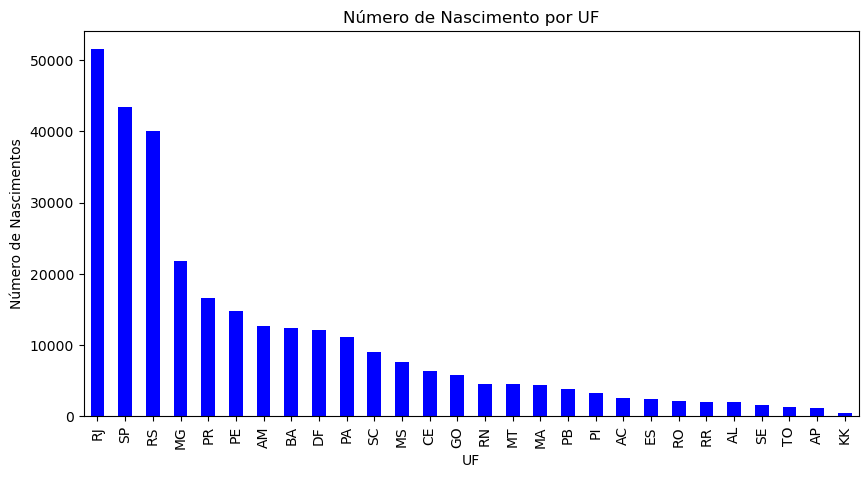

In [27]:
plt.figure(figsize=(10,5))
contagem_nascimento.plot(kind='bar', color= 'blue')
plt.title('Número de Nascimento por UF')
plt.xlabel('UF')
plt.ylabel('Número de Nascimentos')
plt.show()

### Gráfico de barras para UF de Residência

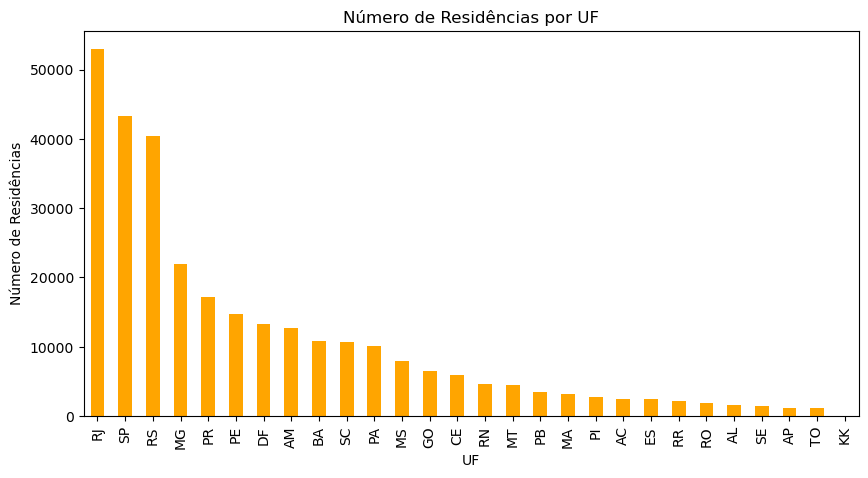

In [28]:
plt.figure(figsize=(10,5))
contagem_residencia.plot(kind='bar', color='orange')
plt.title('Número de Residências por UF')
plt.xlabel('UF')
plt.ylabel('Número de Residências')
plt.show()

### Altura

<Axes: >

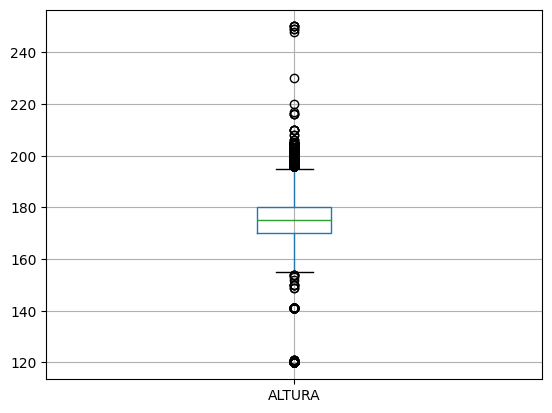

In [12]:
df[['ALTURA']].boxplot()

De acordo com o Boxplot, há valores nas extremidades que não condizem com a realidade. Pessoas com mais de 2,40 metros, não sendo razoável encontrarmos 7 com essa estatura em nossa pesquisa.

Já na outra extremidade, pessoas com estatura menor que 1,4m é algo mais factível, porém o número é bem alto comparado ao universo da pesquisa (mais de 3.000 casos).

In [31]:
df[(df['ALTURA'] >= 240)]

,Unnamed: 0,ANO_NASCIMENTO,PESO,ALTURA,CABECA,CALCADO,CINTURA,MUN_NASCIMENTO,UF_NASCIMENTO,PAIS_NASCIMENTO,...,DISPENSA,ZONA_RESIDENCIAL,MUN_RESIDENCIA,UF_RESIDENCIA,PAIS_RESIDENCIA,JSM,MUN_JSM,UF_JSM,REGIAO_NASCIMENTO,REGIAO_RESIDENCIA
26327,26390,2004,85.0,249.0,56.0,42.0,76.0,CAMAQUA,RS,BRASIL,...,Com dispensa,Urbana,PORTO ALEGRE,RS,BRASIL,8/50 - PORTO ALEGRE,PORTO ALEGRE,RS,Sul,Sul
47606,47694,2004,55.0,248.0,42.0,45.0,50.0,RECIFE,PE,BRASIL,...,Com dispensa,Urbana,JABOATAO DOS GUARARAPES,PE,BRASIL,21/82 - JABOATAO DOS GUARARAPES PRAZERES,JABOATAO DOS GUARARAPES,PE,Nordeste,Nordeste
136474,136750,2004,77.0,249.0,56.0,42.0,80.0,BRASILIA,DF,BRASIL,...,Sem dispensa,Urbana,BRASILIA,DF,BRASIL,7/201 - BRASILIA (PLANALTINA),BRASILIA,DF,Centro-Oeste,Centro-Oeste
157535,157853,2004,58.0,250.0,59.0,41.0,86.0,PORTO ALEGRE,RS,BRASIL,...,Com dispensa,Urbana,VIAMAO,RS,BRASIL,8/75 - VIAMAO,VIAMAO,RS,Sul,Sul
162376,162706,2001,70.0,250.0,44.0,31.0,104.0,JABOATAO DOS GUARARAPES,PE,BRASIL,...,Com dispensa,Urbana,JABOATAO DOS GUARARAPES,PE,BRASIL,21/41 - JABOATAO DOS GUARARAPES,JABOATAO DOS GUARARAPES,PE,Nordeste,Nordeste
186217,186574,2003,55.0,250.0,41.0,30.0,53.0,RECIFE,PE,BRASIL,...,Com dispensa,Urbana,RECIFE,PE,BRASIL,21/76 - RECIFE COMPAZ EDUARDO CAMPOS,RECIFE,PE,Nordeste,Nordeste
299044,299590,2004,55.0,250.0,41.0,30.0,50.0,RIO DE JANEIRO,RJ,BRASIL,...,Com dispensa,Urbana,RIO DE JANEIRO,RJ,BRASIL,2/159 - RIO DE JANEIRO (BARRA DA TIJUCA),RIO DE JANEIRO,RJ,Sudeste,Sudeste


In [35]:
df[(df['ALTURA'] <= 140)]

,Unnamed: 0,ANO_NASCIMENTO,PESO,ALTURA,CABECA,CALCADO,CINTURA,MUN_NASCIMENTO,UF_NASCIMENTO,PAIS_NASCIMENTO,...,DISPENSA,ZONA_RESIDENCIAL,MUN_RESIDENCIA,UF_RESIDENCIA,PAIS_RESIDENCIA,JSM,MUN_JSM,UF_JSM,REGIAO_NASCIMENTO,REGIAO_RESIDENCIA
148,156,2003,30.0,120.0,41.0,30.0,50.0,CANOAS,RS,BRASIL,...,Com dispensa,Urbana,CANOAS,RS,BRASIL,8/17 - CANOAS,CANOAS,RS,Sul,Sul
302,310,2003,30.0,120.0,41.0,30.0,50.0,CANOAS,RS,BRASIL,...,Com dispensa,Urbana,CANOAS,RS,BRASIL,8/17 - CANOAS,CANOAS,RS,Sul,Sul
1095,1103,2004,30.0,120.0,41.0,30.0,50.0,ARACAJU,SE,BRASIL,...,Com dispensa,Urbana,ARACAJU,SE,BRASIL,19/3 - ARACAJU,ARACAJU,SE,Nordeste,Nordeste
1245,1253,2002,30.0,120.0,41.0,30.0,50.0,ARARUAMA,RJ,BRASIL,...,Com dispensa,Urbana,RIO DE JANEIRO,RJ,BRASIL,2/113 - RIO DE JANEIRO (INHAUMA),RIO DE JANEIRO,RJ,Sudeste,Sudeste
1552,1561,2001,30.0,120.0,41.0,30.0,50.0,FORTALEZA,CE,BRASIL,...,Com dispensa,Urbana,FORTALEZA,CE,BRASIL,25/143 - FORTALEZA (JOVITA FEITOSA),FORTALEZA,CE,Nordeste,Nordeste
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300279,300827,2002,30.0,120.0,41.0,30.0,50.0,MARITUBA,PA,BRASIL,...,Com dispensa,Urbana,JOINVILLE,SC,BRASIL,16/52 - JOINVILLE,JOINVILLE,SC,Norte,Sul
300347,300895,2004,30.0,120.0,41.0,30.0,50.0,GETULIO VARGAS,RS,BRASIL,...,Com dispensa,Urbana,GETULIO VARGAS,RS,BRASIL,10/31 - GETULIO VARGAS,GETULIO VARGAS,RS,Sul,Sul
300602,301151,2001,30.0,120.0,41.0,30.0,50.0,PORTO ALEGRE,RS,BRASIL,...,Com dispensa,Urbana,PORTO ALEGRE,RS,BRASIL,8/50 - PORTO ALEGRE,PORTO ALEGRE,RS,Sul,Sul
300606,301155,2002,30.0,120.0,41.0,30.0,50.0,RIO DE JANEIRO,RJ,BRASIL,...,Com dispensa,Urbana,RIO DE JANEIRO,RJ,BRASIL,2/115 - RIO DE JANEIRO (ENGENHO NOVO),RIO DE JANEIRO,RJ,Sudeste,Sudeste


In [8]:
# ALTURA x CALCADO

round(df[(df['ALTURA'] >= 240)].describe(), 2)

,Unnamed: 0,ANO_NASCIMENTO,PESO,ALTURA,CABECA,CALCADO,CINTURA,VINCULACAO_ANO
count,7.00,7.00,7.00,7.00,7.00,7.00,7.00,7.0
mean,145365.29,2003.43,65.00,249.43,48.43,37.29,71.29,2022.0
std,91021.14,1.13,12.37,0.79,8.14,6.63,20.92,0.0
min,26390.00,2001.00,55.00,248.00,41.00,30.00,50.00,2022.0
25%,92222.00,2003.50,55.00,249.00,41.50,30.50,51.50,2022.0
50%,157853.00,2004.00,58.00,250.00,44.00,41.00,76.00,2022.0
75%,174640.00,2004.00,73.50,250.00,56.00,42.00,83.00,2022.0
max,299590.00,2004.00,85.00,250.00,59.00,45.00,104.00,2022.0


Na tabela acima vemos que a média do calçado das pessoas com mais de 2,4m é 37,29, **o que demonstra algum erro na prospecção dos dados.**

In [28]:
round(df[(df['ALTURA'] <= 140)].describe(), 2)

,Unnamed: 0,ANO_NASCIMENTO,PESO,ALTURA,CABECA,CALCADO,CINTURA,VINCULACAO_ANO
count,3019.00,3019.00,3019.00,3019.00,3019.00,3019.00,3019.00,3019.0
mean,152598.30,2002.25,30.37,120.00,41.10,30.08,50.16,2022.0
std,84915.91,1.46,4.71,0.04,1.22,0.92,2.23,0.0
min,156.00,1979.00,30.00,120.00,41.00,30.00,50.00,2022.0
25%,77867.00,2001.00,30.00,120.00,41.00,30.00,50.00,2022.0
50%,156827.00,2003.00,30.00,120.00,41.00,30.00,50.00,2022.0
75%,222202.50,2004.00,30.00,120.00,41.00,30.00,50.00,2022.0
max,301273.00,2006.00,178.00,121.00,60.00,46.00,109.00,2022.0


In [36]:
df[['REGIAO_NASCIMENTO', 'ALTURA']][df['ALTURA'] <= 140].value_counts()

REGIAO_NASCIMENTO  ALTURA
Nordeste           120.0     1233
Sul                120.0      810
Sudeste            120.0      528
Norte              120.0      226
Centro-Oeste       120.0      213
                   121.0        2
Norte              121.0        2
Sul                121.0        1
Name: count, dtype: int64

In [45]:
df[['REGIAO_NASCIMENTO', 'ALTURA']][df['ALTURA'] > 240].value_counts()

REGIAO_NASCIMENTO  ALTURA
Nordeste           250.0     2
Centro-Oeste       249.0     1
Nordeste           248.0     1
Sudeste            250.0     1
Sul                249.0     1
                   250.0     1
Name: count, dtype: int64

### Criando uma coluna com a idade dos alistados no ano que se alistaram

In [37]:
df['IDADE_ALISTADO'] = df['VINCULACAO_ANO'] - df['ANO_NASCIMENTO']

### Conferindo alistados acima de 28 anos

In [40]:
alistados_25 = df.loc[df['IDADE_ALISTADO'] >= 28, ['MUN_NASCIMENTO','IDADE_ALISTADO']]
alistados_25

,MUN_NASCIMENTO,IDADE_ALISTADO
1,PORTO ALEGRE,48
7650,NOVO HAMBURGO,30
16681,DUQUE DE CAXIAS,39
16682,TUPARENDI,30
26096,SANTA VITORIA DO PALMAR,31
32691,SARANDI,33
32824,MARABA,33
56651,CURITIBA,30
91970,ANAPOLIS,43
112777,PINDAMONHANGABA,33


### Dispensa Automática ( idade >= 28 anos ou altura < 1,60 m)

In [42]:
df['SEXO']

0         M
1         M
2         M
3         M
4         M
         ..
300909    M
300910    M
300911    M
300912    M
300913    M
Name: SEXO, Length: 300914, dtype: object

###  Dispensa Automática não realizada

####  - Mulher dispensada automaticamente: menor que 1,55m de altura ou com idade maior que 28 anos.
####  - Homem dispensado automaticamente: menor que 1,6m de altura ou com idade maior que 28 anos.


In [51]:
df[['DISPENSA', 'SEXO', 'ALTURA', 'IDADE_ALISTADO']][(df['SEXO'] == 'F') & (df['ALTURA'] < 155) |
                                                     (df['SEXO'] == 'M') &( df['ALTURA'] < 160) &
                                                    (df['DISPENSA'] == 'Sem dispensa')]

,DISPENSA,SEXO,ALTURA,IDADE_ALISTADO
197,Sem dispensa,M,156.0,20
363,Sem dispensa,M,159.0,20
518,Sem dispensa,M,155.0,19
564,Sem dispensa,M,155.0,20
1109,Sem dispensa,M,159.0,18
...,...,...,...,...
300322,Sem dispensa,M,155.0,18
300493,Sem dispensa,M,159.0,19
300780,Sem dispensa,M,155.0,18
300829,Sem dispensa,M,159.0,18


### Média de idade no alistamento

In [11]:
round(df['Idade_alistado'].mean(), 2)

18.36

### Descrição dos Dados

In [9]:
df.describe()

,Unnamed: 0,ANO_NASCIMENTO,PESO,ALTURA,CABECA,CALCADO,CINTURA,VINCULACAO_ANO
count,300914.000000,300914.000000,300914.000000,300914.000000,300914.000000,300914.000000,300914.000000,300914.0
mean,150745.292393,2003.637471,70.131373,174.417648,56.456689,40.959570,77.289827,2022.0
std,87022.099189,0.866453,14.834385,8.987376,3.591626,2.336608,13.225223,0.0
min,1.000000,1925.000000,30.000000,120.000000,41.000000,30.000000,50.000000,2022.0
25%,75388.250000,2004.000000,60.000000,170.000000,56.000000,40.000000,71.000000,2022.0
50%,150751.500000,2004.000000,67.000000,175.000000,57.000000,41.000000,78.000000,2022.0
75%,226094.750000,2004.000000,77.000000,180.000000,58.000000,42.000000,85.000000,2022.0
max,301462.000000,2006.000000,200.000000,250.000000,79.000000,50.000000,180.000000,2022.0


In [51]:
df[['ANO_NASCIMENTO', 'PESO', 'ALTURA', 'CALCADO', 'CINTURA']].mean().apply(lambda x: round(x, 2))

ANO_NASCIMENTO    2003.64
PESO                70.13
ALTURA             174.42
CALCADO             40.96
CINTURA             77.29
dtype: float64

### Distribuição de dispensa militar

In [106]:
dispensas=df['DISPENSA'].value_counts()
dispensas

DISPENSA
Com dispensa    193913
Sem dispensa    107001
Name: count, dtype: int64

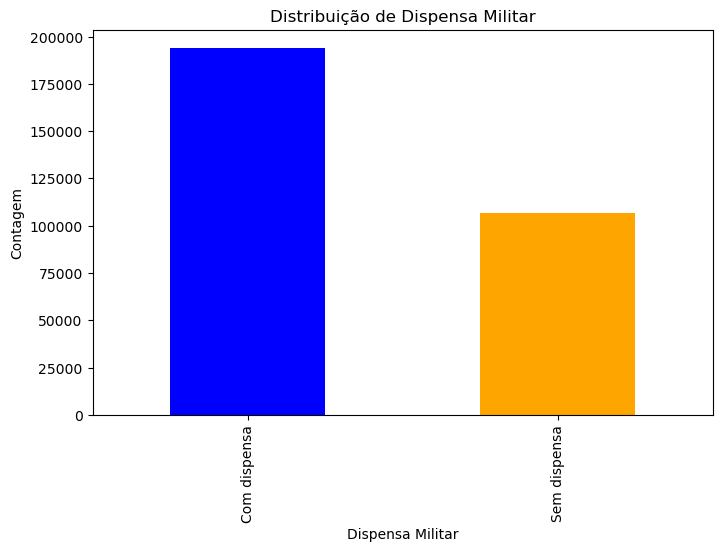

In [63]:
plt.figure(figsize=(8,5))
dispensas.plot(kind='bar', color=['blue','orange'])
plt.title('Distribuição de Dispensa Militar')
plt.xlabel('Dispensa Militar')
plt.ylabel('Contagem')
plt.show()

#### por Sexo

In [14]:
df[['DISPENSA', 'SEXO']].value_counts()

DISPENSA      SEXO
Com dispensa  M       193885
Sem dispensa  M       106988
Com dispensa  F           28
Sem dispensa  F           13
Name: count, dtype: int64

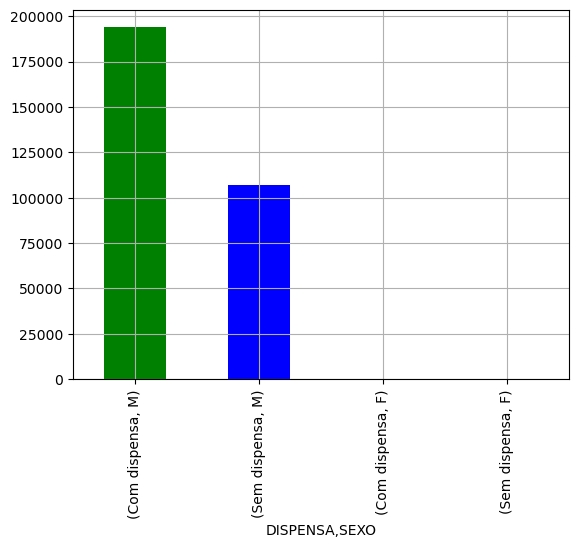

In [17]:
df[['DISPENSA', 'SEXO']].value_counts().plot(kind = 'bar', color=['green', 'blue', 'cyan', 'orange'], grid = True)

plt.show()

### Alterando a coluna de Id

In [64]:
df.set_index('Unnamed: 0', inplace=True)
df.columns

Index(['ANO_NASCIMENTO', 'PESO', 'ALTURA', 'CABECA', 'CALCADO', 'CINTURA',
       'MUN_NASCIMENTO', 'UF_NASCIMENTO', 'PAIS_NASCIMENTO', 'ESTADO_CIVIL',
       'SEXO', 'ESCOLARIDADE', 'VINCULACAO_ANO', 'DISPENSA',
       'ZONA_RESIDENCIAL', 'MUN_RESIDENCIA', 'UF_RESIDENCIA',
       'PAIS_RESIDENCIA', 'JSM', 'MUN_JSM', 'UF_JSM'],
      dtype='object')

### Criação e atribuição de valores às colunas 'IMC' e 'CLASSIFICACAO_IMC'

In [52]:
# Criação da coluna referente ao IMC de cada pessoa 

df['IMC'] = df['PESO']/((df['ALTURA']/100)**2)
df['IMC'] = round(df['IMC'], 2)

In [53]:
# Criação da coluna referente à CLASSIFICAÇÃO DO IMC de cada pessoa 

df.loc[df['IMC'] < 16.9, 'CLASSIFICACAO_IMC'] = 'Muito Abaixo do Peso'
df.loc[(df['IMC'] >= 16.9) & (df['IMC'] < 18.4), 'CLASSIFICACAO_IMC'] = 'Abaixo do Peso'
df.loc[(df['IMC'] >= 18.4) & (df['IMC'] < 24.9), 'CLASSIFICACAO_IMC'] = 'Peso Normal'
df.loc[(df['IMC'] >= 24.9) & (df['IMC'] < 29.9), 'CLASSIFICACAO_IMC'] = 'Acima do Peso'
df.loc[(df['IMC'] >= 29.9) & (df['IMC'] < 34.9), 'CLASSIFICACAO_IMC'] = 'Obesidade Grau 1'
df.loc[(df['IMC'] >= 34.9) & (df['IMC'] < 40), 'CLASSIFICACAO_IMC'] = 'Obesidade Grau 2'
df.loc[(df['IMC'] >= 40), 'CLASSIFICACAO_IMC'] = 'Obesidade Grau 3'

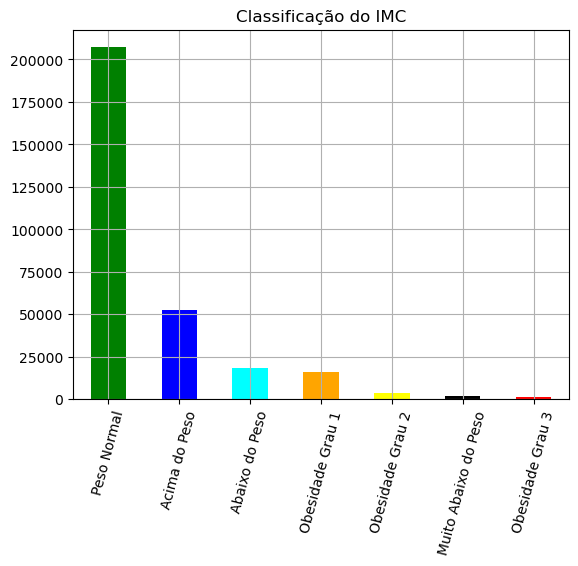

In [54]:
df['CLASSIFICACAO_IMC'].value_counts().plot(kind = 'bar', color=['green', 'blue', 'cyan', 'orange', 'yellow', 'black', 'red'])
plt.grid(True)
plt.plot()
plt.xlabel('')
plt.title('Classificação do IMC')
plt.xticks(rotation=75)

plt.show()

### Migração

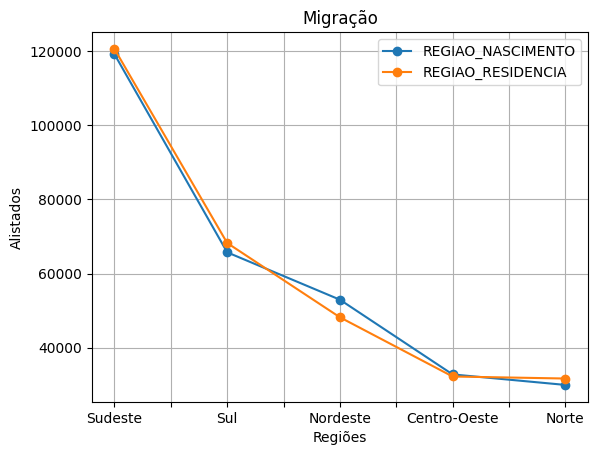

In [26]:
df['REGIAO_NASCIMENTO'].value_counts().plot(kind = 'line', marker = 'o', label = 'REGIAO_NASCIMENTO')
df['REGIAO_RESIDENCIA'].value_counts().plot(kind = 'line', marker = 'o', label = 'REGIAO_RESIDENCIA')
plt.legend()
plt.grid(True)
plt.xlabel('Regiões')
plt.ylabel('Alistados')
plt.title('Migração')

plt.show()

In [27]:
reg = df[['REGIAO_NASCIMENTO', 'REGIAO_RESIDENCIA']][df['REGIAO_NASCIMENTO'] != df['REGIAO_RESIDENCIA']].sort_values(by = 'REGIAO_RESIDENCIA').value_counts().groupby('REGIAO_NASCIMENTO')

In [28]:
df[['REGIAO_NASCIMENTO', 'REGIAO_RESIDENCIA']][df['REGIAO_NASCIMENTO'] != df['REGIAO_RESIDENCIA']].sort_values(by = 'REGIAO_RESIDENCIA').value_counts()

REGIAO_NASCIMENTO  REGIAO_RESIDENCIA
Nordeste           Sudeste              3519
                   Centro-Oeste         1756
Sudeste            Sul                  1433
                   Nordeste             1187
                   Centro-Oeste         1074
Norte              Sul                   707
                   Centro-Oeste          680
Nordeste           Sul                   655
Centro-Oeste       Sudeste               632
Nordeste           Norte                 576
Norte              Sudeste               505
Sul                Sudeste               500
Centro-Oeste       Sul                   495
Sul                Centro-Oeste          293
Norte              Nordeste              251
Centro-Oeste       Nordeste              251
                   Norte                 194
Sudeste            Norte                 175
Sul                Norte                  63
                   Nordeste               62
Name: count, dtype: int64

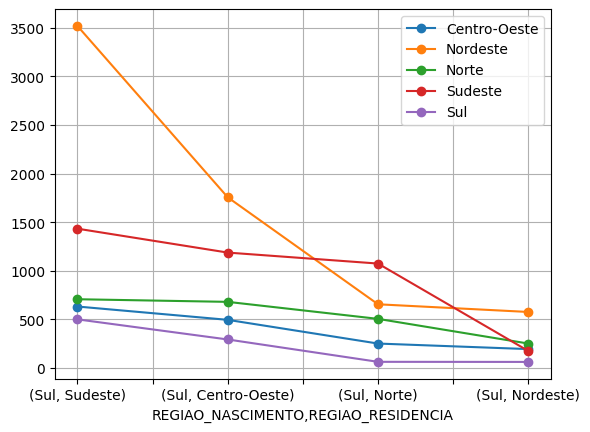

In [30]:
reg.plot(marker = 'o')
plt.legend()
plt.grid()

plt.show()

## Escolaridade

In [31]:
df['ESCOLARIDADE'].unique()

array(['Ensino Médio Completo', '7° Ano - Ensino Fundamental',
       '3° Ano - Ensino Médio', '2° Semestre - Ensino Superior',
       '2° Ano - Ensino Médio', '9° Ano - Ensino Fundamental',
       '1° Ano - Ensino Médio', '3° Semestre - Ensino Superior',
       '1° Semestre - Ensino Superior', '4° Semestre - Ensino Superior',
       '4° Ano - Ensino Médio (Profissionalizante)',
       'Ensino Superior Completo', '6° Ano - Ensino Fundamental',
       '5° Ano - Ensino Fundamental', '8° Ano - Ensino Fundamental',
       '6° Semestre - Ensino Superior', '3° Ano - Ensino Fundamental',
       'Ensino Fundamental Completo', '1° Ano - Ensino Fundamental',
       '5° Semestre - Ensino Superior', '2° Ano - Ensino Fundamental',
       '9° Semestre - Ensino Superior', '10° Semestre - Ensino Superior',
       '7° Semestre - Ensino Superior', 'Alfabetizado',
       '4° Ano - Ensino Fundamental', '8° Semestre - Ensino Superior',
       'Pós-Graduaç╞o', 'Analfabeto'], dtype=object)

In [32]:
df.columns

Index(['Unnamed: 0', 'ANO_NASCIMENTO', 'PESO', 'ALTURA', 'CABECA', 'CALCADO',
       'CINTURA', 'MUN_NASCIMENTO', 'UF_NASCIMENTO', 'PAIS_NASCIMENTO',
       'ESTADO_CIVIL', 'SEXO', 'ESCOLARIDADE', 'VINCULACAO_ANO', 'DISPENSA',
       'ZONA_RESIDENCIAL', 'MUN_RESIDENCIA', 'UF_RESIDENCIA',
       'PAIS_RESIDENCIA', 'JSM', 'MUN_JSM', 'UF_JSM', 'IMC',
       'CLASSIFICACAO_IMC', 'REGIAO_NASCIMENTO', 'REGIAO_RESIDENCIA'],
      dtype='object')

## Com dispensa X Sem Dispensa

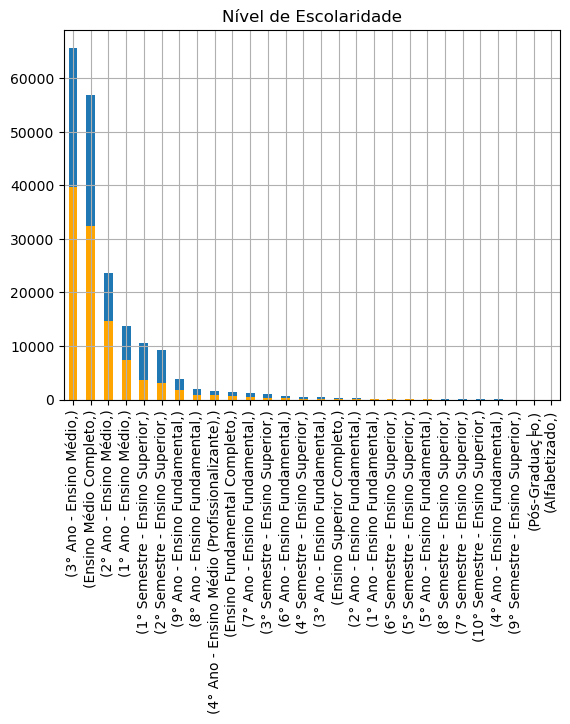

In [67]:
df[['ESCOLARIDADE']][df['DISPENSA'] == 'Com dispensa'].value_counts().plot(kind = 'bar')
df[['ESCOLARIDADE']][df['DISPENSA'] == 'Sem dispensa'].value_counts().plot(kind = 'bar', color = 'orange')
plt.grid()
plt.xlabel('')
plt.title('Nível de Escolaridade')
plt.xticks(rotation=90)
plt.show()
